In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Уберём некорректные записи

In [4]:
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']
data = data[data['Category'] != '1.9']

Предобработвем данные 

In [5]:
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

data['Reviews'] = data['Reviews'].astype(int)

data['Size'] = data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: 1 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].astype(float)


data['Price'] = data['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: float(x))

Всего в датасете 10841 запись и 13 признаков объектов

Посмотрим как люди оценивают приложения по категориям

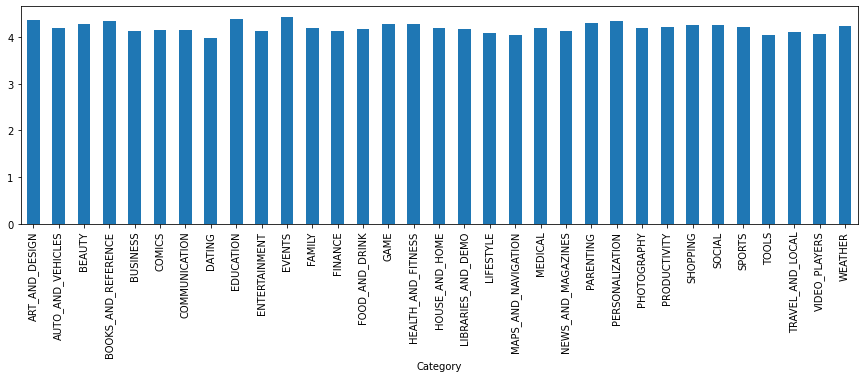

In [6]:
data.groupby('Category')['Rating'].mean().plot.bar(figsize=(15,4))

In [7]:
print(data.groupby('Category')['Rating'].mean().mean(), data.groupby('Category')['Rating'].mean().std())

4.202144661964567 0.10560632340916593


Очевидно, средний рейтинг приложений по категориям особо не отличается. При этом средний рейтинг по категориям - 4.2, стандартное отклонение - 0.1

Теперь посмотрим на то, какие категории приложений чаще всего публикуются в Google Play

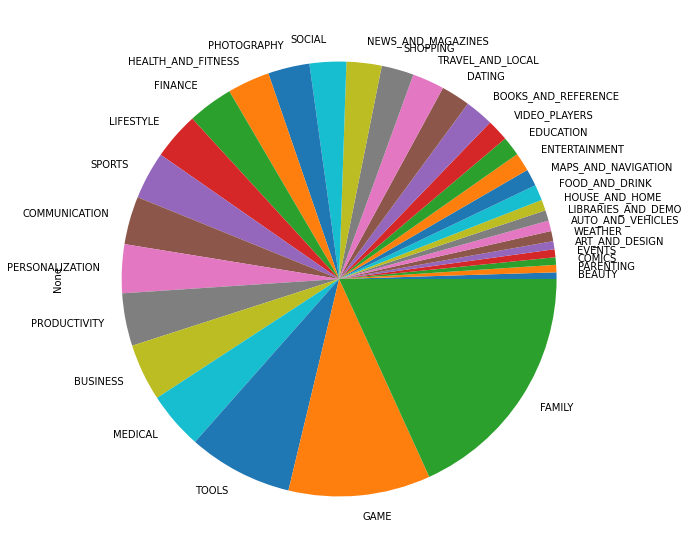

In [20]:
data.groupby('Category').count().max(axis=1).sort_values().plot.pie(figsize=(15,10))

Теперь посмотрим приложения какой категории скачивают чаще всего

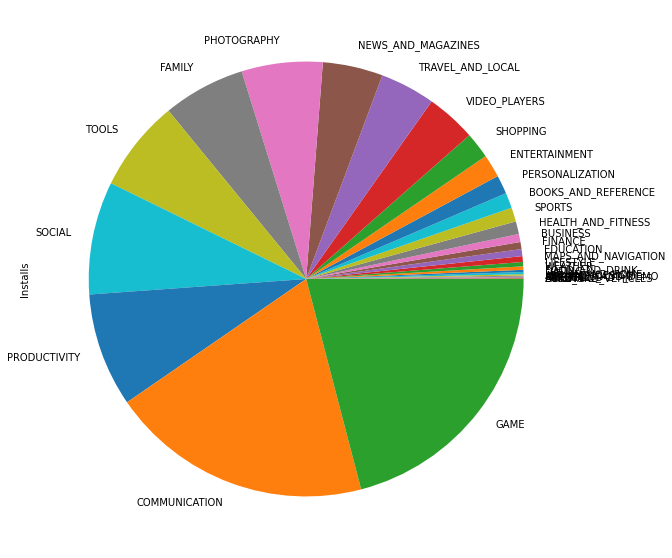

In [21]:
data.groupby('Category')['Installs'].sum().sort_values().plot.pie(figsize=(15,10))

Как можно заметить, не смотря на то, что чаще всего выпускают приложения семейной категории, скачиваются чаще всего игры, приложения для коммуникации и т.д.

Попробуем найти зависимость количества установок от цены приложения

C:\Users\licei\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


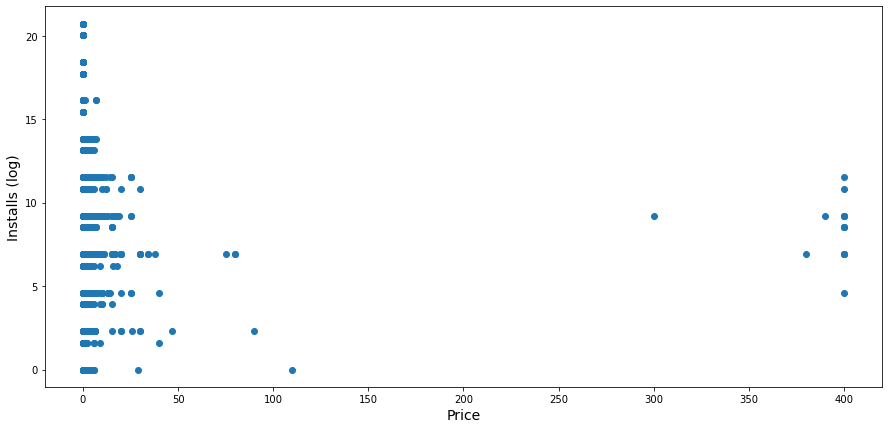

In [10]:
plt.figure(figsize=(15,7))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Installs (log)', fontsize=14)
plt.scatter(data['Price'], np.log(data['Installs']))

Удивительно, но существуют приложения с ценой больше трёхсот долларов, которые покупают! Посмотрим ближе распределение установок с более адекватной ценой

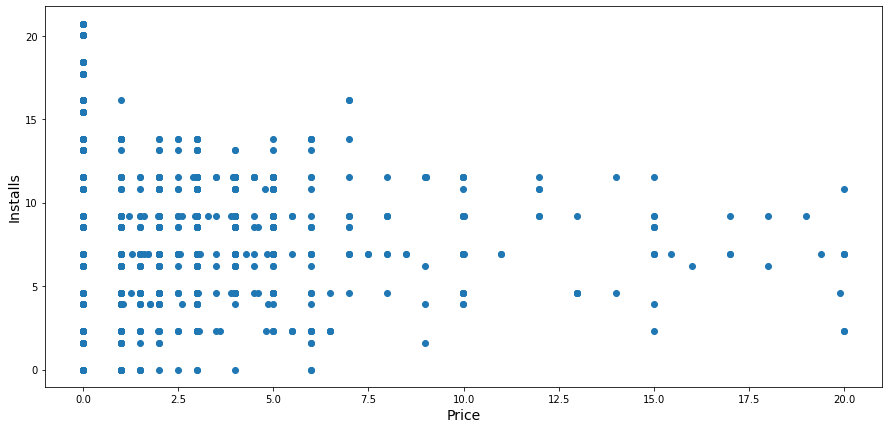

In [11]:
plt.figure(figsize=(15,7))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Installs', fontsize=14)
plt.scatter(data[data['Price'] < 20]['Price'], np.log(data[data['Price'] < 20]['Installs']))

Очевидно, более дешёвые приложения качаются чаще

Посмотрим на корреляцию признаков:

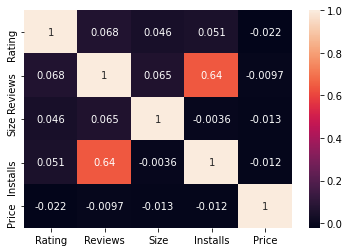

In [12]:
sns.heatmap(data.corr(), annot=True)

Корреляции в данных слабые. Однако видна явная положительная зависимость между количеством установок и количеством отзывов

Category
ART_AND_DESIGN         AxesSubplot(0.125,0.125;0.775x0.755)
AUTO_AND_VEHICLES      AxesSubplot(0.125,0.125;0.775x0.755)
BEAUTY                 AxesSubplot(0.125,0.125;0.775x0.755)
BOOKS_AND_REFERENCE    AxesSubplot(0.125,0.125;0.775x0.755)
BUSINESS               AxesSubplot(0.125,0.125;0.775x0.755)
COMICS                 AxesSubplot(0.125,0.125;0.775x0.755)
COMMUNICATION          AxesSubplot(0.125,0.125;0.775x0.755)
DATING                 AxesSubplot(0.125,0.125;0.775x0.755)
EDUCATION              AxesSubplot(0.125,0.125;0.775x0.755)
ENTERTAINMENT          AxesSubplot(0.125,0.125;0.775x0.755)
EVENTS                 AxesSubplot(0.125,0.125;0.775x0.755)
FAMILY                 AxesSubplot(0.125,0.125;0.775x0.755)
FINANCE                AxesSubplot(0.125,0.125;0.775x0.755)
FOOD_AND_DRINK         AxesSubplot(0.125,0.125;0.775x0.755)
GAME                   AxesSubplot(0.125,0.125;0.775x0.755)
HEALTH_AND_FITNESS     AxesSubplot(0.125,0.125;0.775x0.755)
HOUSE_AND_HOME         AxesSubp

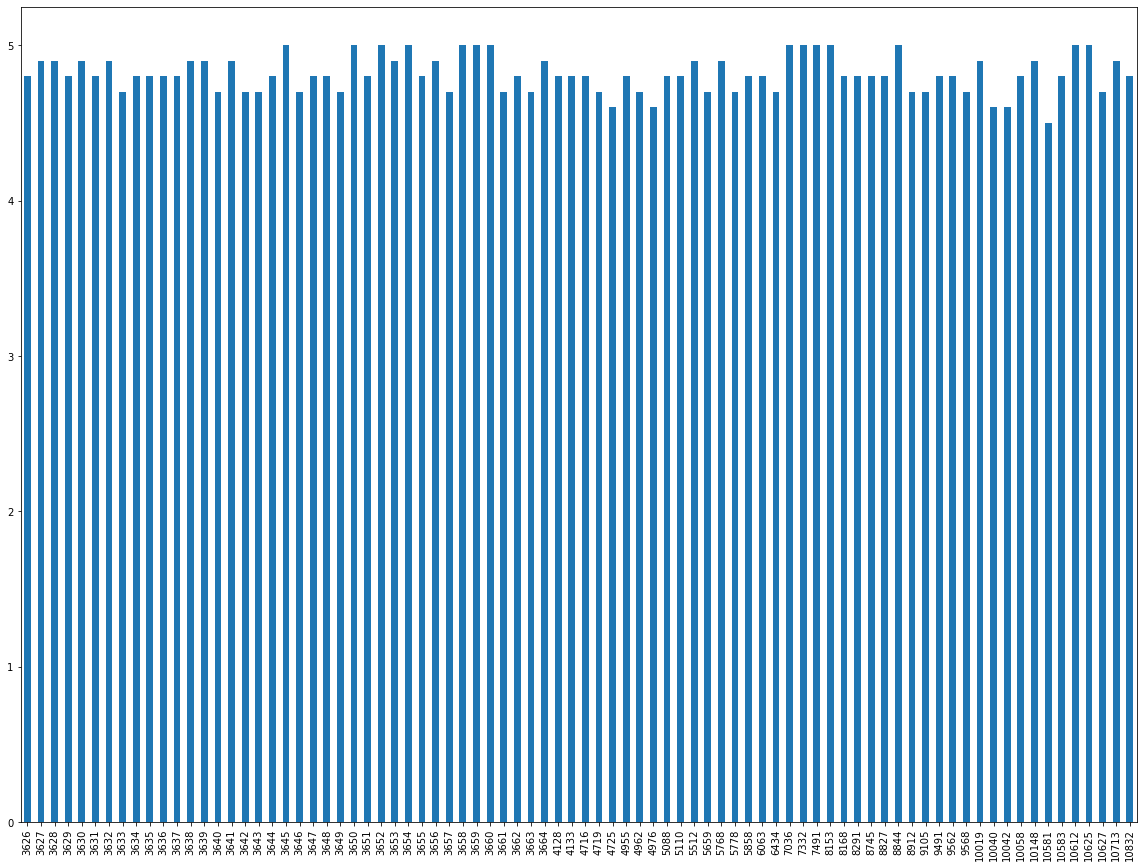

In [29]:
data.groupby('Category')['Rating'].plot.bar(figsize=(20,15))